In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
DF_Final= pd.read_csv("Data_Final.csv")


In [3]:
documents = []
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

X = DF_Final.Review
stemmer = WordNetLemmatizer()
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yufeiwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()



In [20]:

#------------------------------------Sentiment Lexicon------------------------------------------\
f_n = open("negative-words.txt", "r")
Negative_words = f_n.readlines()
f_p = open("positive-words.txt", "r")
Positive_words = f_p.readlines()
Voca = [i.rstrip('\n') for i in Positive_words] + [i.rstrip('\n') for i in Negative_words]
vectorizer = CountVectorizer(vocabulary=np.unique(Voca))
X = vectorizer.fit_transform(documents).toarray()


In [21]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
Voca_P = [i.rstrip('\n') for i in Positive_words]
vectorizer_P = CountVectorizer(vocabulary=np.unique(Voca_P))
X_P = vectorizer_P.fit_transform(documents).toarray()

In [28]:
Voca_N = [i.rstrip('\n') for i in Negative_words]
vectorizer_N = CountVectorizer(vocabulary=np.unique(Voca_N))
X_N = vectorizer_N.fit_transform(documents).toarray()

In [37]:
print(X_N)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
import csv
with open('Processed_X_N.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(X_N)

In [40]:
import csv
with open('Processed_X_P.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(X_P)

In [35]:
len(X_N)

53845

In [33]:
np.savetxt("Processed_Final_Data_X_P.csv", X_P, fmt = '%s')

In [34]:
np.savetxt("Processed_Final_Data_X_N.csv", X_N, fmt = '%s')

In [11]:
DF_Final['Star'].replace({5.0:1, 4.0:1, 3.0:0,2.0:0, 1.0:0}, inplace=True)

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [43]:
df = DF_Final


In [44]:
text = " ".join(cat.split()[1] for cat in DF_Final.Review)

In [45]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

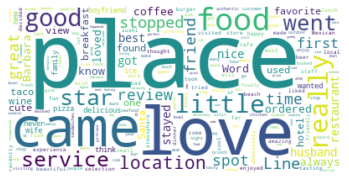

In [46]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yufeiwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
x = X

In [16]:
len(X)

53845

In [17]:
y = DF_Final['Star']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
ranfor= RandomForestClassifier(n_estimators = 10, criterion = "entropy").fit(x_train,y_train)

ranfor_pred=ranfor.predict(x_test)


print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test,ranfor_pred))
print("Score:",round(accuracy_score(y_test,ranfor_pred)*100,2))
print("Classification Report:",classification_report(y_test,ranfor_pred))

Confusion Matrix for Random Forest:
[[1278 1431]
 [ 696 7364]]
Score: 80.25
Classification Report:               precision    recall  f1-score   support

         0.0       0.65      0.47      0.55      2709
         1.0       0.84      0.91      0.87      8060

    accuracy                           0.80     10769
   macro avg       0.74      0.69      0.71     10769
weighted avg       0.79      0.80      0.79     10769

